# Import libraries

In [1]:
pip install pandas matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# loaded the satellite telemetry dataset from the CSV file and displayed the first few rows to see the data structure

In [5]:
df = pd.read_csv(r"C:\Users\faizu\Downloads\uhf_telemetry\uhf_telemetry.csv")
df.head()

,Timestamp,ADCS_mode,X_Coarse_Spin,Y_Coarse_Spin,Z_Coarse_Spin,PD1_CSS_theta,PD2_CSS_theta,PD3_CSS_theta,PD4_CSS_theta,PD5_CSS_theta,...,ACU2_Temp,Battery_Temp,Battery_Voltage,NanoMind_Temp,PDU_Channels_Status,SDR_Temp,SEPP_Temp,Background_RSSI,Last_RSSI,NanoCom_Temp
0,2024-05-01 04:57:03.720000,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4733.0,NaN,NaN,NaN,NaN,NaN
1,2024-05-01 04:57:10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-111.0,0.0,434.0
2,2024-05-01 04:57:18.111000,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4733.0,NaN,NaN,NaN,NaN,NaN
3,2024-05-01 04:57:22.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-93.0,0.0,436.0
4,2024-05-01 04:57:32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-102.0,0.0,438.0


In [7]:
print(df.columns)

Index(['Timestamp', 'ADCS_mode', 'X_Coarse_Spin', 'Y_Coarse_Spin',
       'Z_Coarse_Spin', 'PD1_CSS_theta', 'PD2_CSS_theta', 'PD3_CSS_theta',
       'PD4_CSS_theta', 'PD5_CSS_theta', 'PD6_CSS_theta', 'HD_Cam_Temp',
       'ACU2_Temp', 'Battery_Temp', 'Battery_Voltage', 'NanoMind_Temp',
       'PDU_Channels_Status', 'SDR_Temp', 'SEPP_Temp', 'Background_RSSI',
       'Last_RSSI', 'NanoCom_Temp'],
      dtype='object')


# converted the time column into a proper datetime format, removed bad rows, sorted by time, and set it as the index so that all data is aligned to time

In [9]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")
df = df.dropna(subset=["Timestamp"]).sort_values("Timestamp")
df = df.set_index("Timestamp")
df.head()

,ADCS_mode,X_Coarse_Spin,Y_Coarse_Spin,Z_Coarse_Spin,PD1_CSS_theta,PD2_CSS_theta,PD3_CSS_theta,PD4_CSS_theta,PD5_CSS_theta,PD6_CSS_theta,...,ACU2_Temp,Battery_Temp,Battery_Voltage,NanoMind_Temp,PDU_Channels_Status,SDR_Temp,SEPP_Temp,Background_RSSI,Last_RSSI,NanoCom_Temp
Timestamp,,,,,,,,,,,,,,,,,,,,,
2024-05-01 04:57:03.720,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4733.0,NaN,NaN,NaN,NaN,NaN
2024-05-01 04:57:10.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-111.0,0.0,434.0
2024-05-01 04:57:18.111,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4733.0,NaN,NaN,NaN,NaN,NaN
2024-05-01 04:57:22.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-93.0,0.0,436.0
2024-05-01 04:57:32.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-102.0,0.0,438.0


# plotted the battery temperature to check the thermal conditions of the satellite.

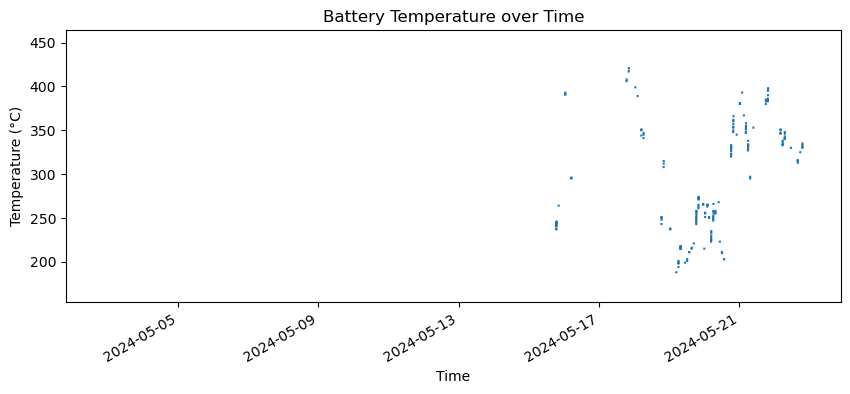

In [11]:
df["Battery_Temp"].plot(figsize=(10,4))
plt.title("Battery Temperature over Time")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.show()